In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso , Ridge ,LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,recall_score,precision_score,root_mean_squared_error,root_mean_squared_log_error
from sklearn.metrics import f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder , LabelEncoder,MinMaxScaler
from sklearn import linear_model
import math
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor , plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier , RandomForestRegressor
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [219]:
df = pd.read_csv('Housing.CSV')
print (df .shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [220]:
df.duplicated().sum()

np.int64(0)

In [221]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [223]:
df.isna().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [224]:
df.replace("no",0,inplace=True)
df.replace("yes",1,inplace=True)

In [225]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [226]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [227]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [229]:
# الدمي = dummies :)
# دي بدل الدمي بس لو عمل دمي هيكون احسن الان هضيف فيوتشرز زياده للداتا وهيكون افضل
# df['furnishingstatus'].replace("unfurnished",0,inplace=True)
# df['furnishingstatus'].replace("semi-furnished",0.5,inplace=True)
# df['furnishingstatus'].replace("furnished",1,inplace=True)

In [230]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8400000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,8400000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,8400000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,8400000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,8400000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [231]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.538937,0.369350,0.504247,0.440189,0.311716,0.277771,0.191771,0.100666,0.468442,0.369016,0.329171,0.073263,-0.289013
area,0.538937,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.369350,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.504247,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.440189,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.311716,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.277771,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.191771,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.100666,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.468442,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


In [232]:
px.box(x=df['area'])

In [233]:
def fix_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    median = data[column].median()
    
    return data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
   

In [234]:
px.box(x=df['area'])


<Axes: >

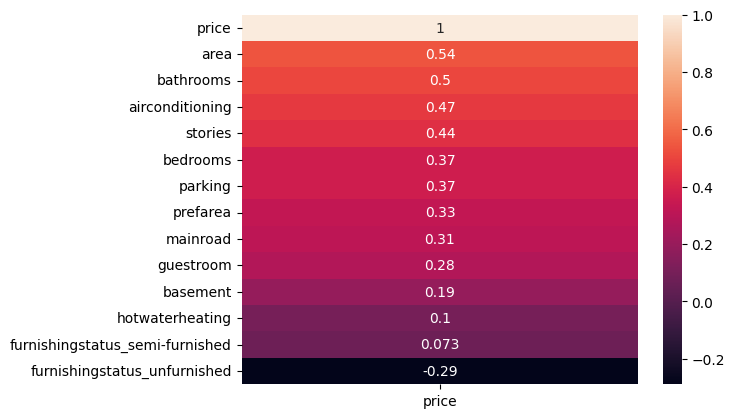

In [235]:
corr_matrix = df.corr()[['price']].sort_values(by='price', ascending=False)
sns.heatmap(corr_matrix, annot=True)

<Axes: xlabel='price', ylabel='area'>

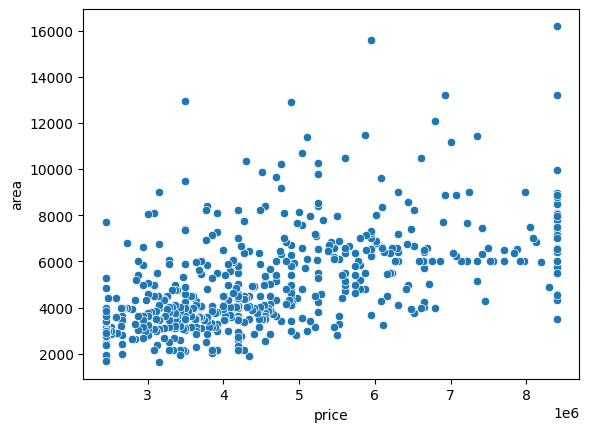

In [236]:
sns.scatterplot(x = "price", y = "area", data=df)

<BarContainer object of 6 artists>

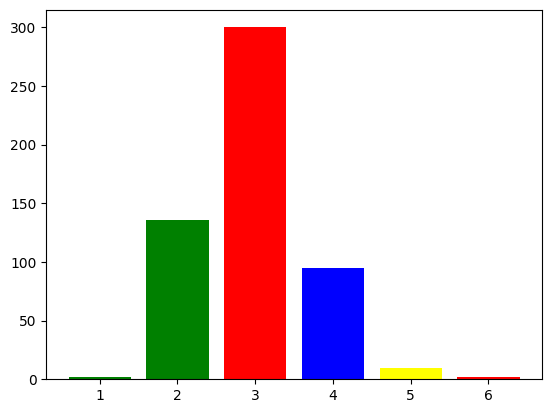

In [237]:
x2 = df['bedrooms'].value_counts().index
y2 = df['bedrooms'].value_counts().values
plt.bar(x2 , y2 , color = ["red" , "green" , "blue" , "yellow"])

In [238]:
parking = df['parking'].value_counts()
px.pie(values=parking, names=parking.index)

<Axes: xlabel='airconditioning', ylabel='count'>

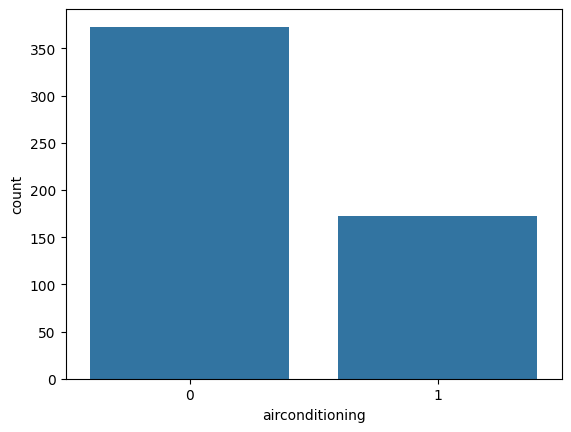

In [239]:
sns.countplot( x = df["airconditioning"] )

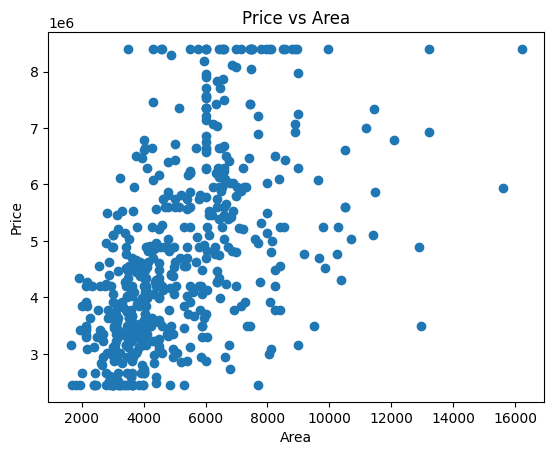

In [242]:
import matplotlib.pyplot as plt
plt.scatter(df['area'], df['price'])
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
#دا بيشوف الداتا لينير ولا لا زي ما حضرتك قولتي في السيشن 
# و طلع انها مش لينير اوووي 

In [240]:
lin=LinearRegression() 
x = df.drop(columns=['price','hotwaterheating'])
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
scaled=StandardScaler()
x_train = scaled.fit_transform(x_train)
x_test = scaled.transform(x_test)

lin.fit(x_train,y_train)
y_pred_train = lin.predict(x_train)
print(f'train : R2 Score: {r2_score(y_train,y_pred_train)}')
print(f'train : Mean Squared Error: {mean_squared_error(y_train,y_pred_train)}')
print(f'train : Mean Absolute Error: {mean_absolute_error(y_train,y_pred_train)}')
print("root_mean_squared_log_error Score (Train):", root_mean_squared_log_error(y_train, y_pred_train))

y_pred = lin.predict(x_test)
print(f'TEST : R2 Score: {r2_score(y_test,y_pred)}')
print(f'TEST : Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'TEST : Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}') 
print("root_mean_squared_log_error Score (Test):", root_mean_squared_log_error(y_test, y_pred))

train : R2 Score: 0.6892016499057153
train : Mean Squared Error: 883518414867.0885
train : Mean Absolute Error: 715755.5226700994
root_mean_squared_log_error Score (Train): 0.19687804775484039
TEST : R2 Score: 0.6703656530971926
TEST : Mean Squared Error: 730993419298.3265
TEST : Mean Absolute Error: 621004.2788067821
root_mean_squared_log_error Score (Test): 0.17482646274634403


In [241]:
poly = PolynomialFeatures(degree=2) 
x = df.drop(columns=['price','hotwaterheating'])
X_poly = poly.fit_transform(x)
lin=LinearRegression() 
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=0)
scaled=StandardScaler()
x_train = scaled.fit_transform(x_train)
x_test = scaled.transform(x_test)

lin.fit(x_train,y_train)
y_pred_train = lin.predict(x_train)
print(f'train : R2 Score: {r2_score(y_train,y_pred_train)}')
print(f'train : Mean Squared Error: {mean_squared_error(y_train,y_pred_train)}')
print(f'train : Mean Absolute Error: {mean_absolute_error(y_train,y_pred_train)}')

y_pred = lin.predict(x_test)
print(f'TEST : R2 Score: {r2_score(y_test,y_pred)}')
print(f'TEST : Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'TEST : Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}') 


train : R2 Score: 0.770829182298675
train : Mean Squared Error: 651472691305.6173
train : Mean Absolute Error: 597168.9160003366
TEST : R2 Score: 0.6117147031839483
TEST : Mean Squared Error: 861057106001.5166
TEST : Mean Absolute Error: 692147.3123053613
